Section B -  Computer Vision & Food Recognition 

In [ ]:
pip install tensorflow keras opencv-python numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
dataset_path = "food_dataset"

# Image size & batch size
img_size = (224, 224)
batch_size = 8  # Small batch size since dataset is small

# Data augmentation & normalization
datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values (0 to 1)
    rotation_range=20,       # Rotate images randomly
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    horizontal_flip=True,    # Flip images randomly
    validation_split=0.2     # 20% of data for validation
)

# Load training and validation sets
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Print class labels
print("Class Labels:", train_generator.class_indices)


Found 80 images belonging to 10 classes.
Found 20 images belonging to 10 classes.
Class Labels: {'burger': 0, 'fried_chicken': 1, 'ice_cream': 2, 'pasta': 3, 'pizza': 4, 'salad': 5, 'sandwich': 6, 'soup': 7, 'steak': 8, 'sushi': 9}


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer (number of classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


c:\Users\Mayur R\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,242 (84.87 MB)

 Trainable params: 22,247,242 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r"C:\Users\Mayur R\Desktop\project\food_dataset"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 77 images belonging to 10 classes.
Found 19 images belonging to 10 classes.


In [17]:
from PIL import Image

dataset_path = r"C:\Users\Mayur R\Desktop\project\food_dataset"

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                rgb_img = img.convert("RGB")  # Convert to standard format
                new_path = file_path.rsplit(".", 1)[0] + ".jpg"  # Save as JPG
                rgb_img.save(new_path, "JPEG")
                print(f"✔ Converted: {file} → {new_path}")
        except Exception as e:
            print(f"❌ Skipping {file}: {e}")


✔ Converted: burger_03.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\burger\burger_03.jpg
✔ Converted: burger_04.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\burger\burger_04.jpg
✔ Converted: burger_05.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\burger\burger_05.jpg
✔ Converted: burger_06.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\burger\burger_06.jpg
✔ Converted: burger_10.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\burger\burger_10.jpg
✔ Converted: fried_chicken_01.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\fried_chicken\fried_chicken_01.jpg
✔ Converted: fried_chicken_02.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\fried_chicken\fried_chicken_02.jpg
✔ Converted: fried_chicken_03.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\fried_chicken\fried_chicken_03.jpg
✔ Converted: fried_chicken_04.jpg → C:\Users\Mayur R\Desktop\project\food_dataset\fried_chicken\fried_chicken_04.jpg
✔ Converted: fried_chicken_05.jpg → C:\Users\Mayur R

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r"C:\Users\Mayur R\Desktop\project\food_dataset"  # Use raw string `r""`

datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 75 images belonging to 10 classes.
Found 17 images belonging to 10 classes.


In [21]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 761ms/step - accuracy: 0.1620 - loss: 2.2559 - val_accuracy: 0.1176 - val_loss: 2.2578
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 732ms/step - accuracy: 0.1497 - loss: 2.2849 - val_accuracy: 0.1176 - val_loss: 2.2225
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 666ms/step - accuracy: 0.1551 - loss: 2.1888 - val_accuracy: 0.1765 - val_loss: 2.2178
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 553ms/step - accuracy: 0.2183 - loss: 2.1029 - val_accuracy: 0.1765 - val_loss: 2.1542
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 0.3613 - loss: 1.9397 - val_accuracy: 0.2941 - val_loss: 2.0829
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 0.4215 - loss: 1.6456 - val_accuracy: 0.4706 - val_loss: 1.9139
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 743ms/step - accuracy: 0.6571 - loss: 1.4172 - val_accuracy: 0.2941 - val_loss: 1.8423
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 559ms/step - accuracy: 0.6230 - loss: 1.1857 - val_accuracy: 0.3529 - val_loss:

In [22]:
# Train the model
epochs = 10  # Train for 10 epochs
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=epochs)

# Save the trained model
model.save("food_cnn_model.h5")
print("Model saved as food_cnn_model.h5")


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step - accuracy: 0.7477 - loss: 0.8435 - val_accuracy: 0.2941 - val_loss: 2.2482
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 783ms/step - accuracy: 0.8397 - loss: 0.5382 - val_accuracy: 0.2941 - val_loss: 2.8015
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - accuracy: 0.7669 - loss: 0.5317 - val_accuracy: 0.2941 - val_loss: 2.0917
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - accuracy: 0.9209 - loss: 0.4165 - val_accuracy: 0.2941 - val_loss: 2.3938
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 559ms/step - accuracy: 0.9327 - loss: 0.4335 - val_accuracy: 0.2941 - val_loss: 2.5015
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 584ms/step - accuracy: 0.9597 - loss: 0.2897 - val_accuracy: 0.1765 - val_loss: 3.9418
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 793ms/step - accuracy: 0.9265 - loss: 0.2255 - val_accuracy: 0.2353 - val_loss: 3.1100
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9527 - loss: 0.1539 - val_accuracy: 0.2941 - val_loss: 2.

Model saved as food_cnn_model.h5


In [ ]:
model.save("food_cnn_model.keras")


In [ ]:
import keras.saving
keras.saving.save_model(model, "food_cnn_model.keras")


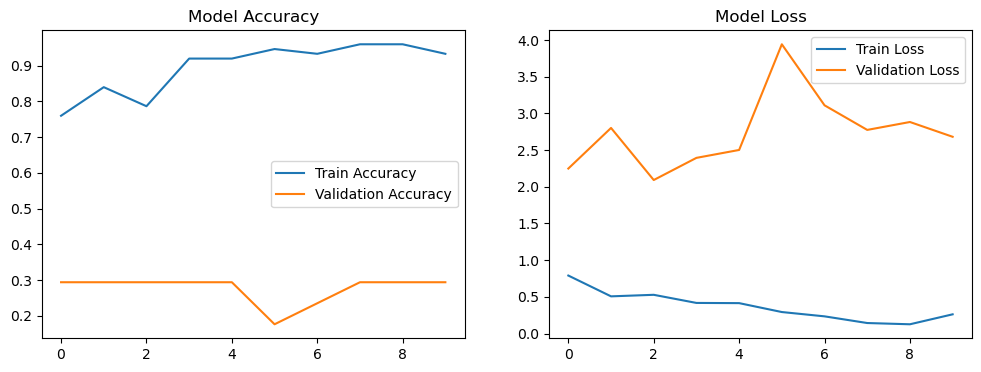

In [25]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [27]:
model = keras.saving.load_model("food_cnn_model.keras")


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset (example)
data = pd.read_csv("food_nutrition_data.csv")  # Ensure your dataset has salt content

# Encode categorical labels (food categories)
encoder = LabelEncoder()
data["Food Category"] = encoder.fit_transform(data["Food Category"])

# Select features (X) and target (y)
X = data.drop(columns=["Salt Content (mg)"])  # Features
y = data["Salt Content (mg)"]  # Target variable

# Split data into training & testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} mg")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 209.04 mg
R² Score: 0.87


In [35]:
df["Food_Label"] = encoder.fit_transform(df["Food Category"])  # ✅ Correct column name


In [36]:
print(df["Food Category"].unique())  # Check available food categories
print(df.isnull().sum())  # Check for missing values


['Pizza' 'Burger' 'Salad' 'Pasta' 'Fries' 'Sushi' 'Steak' 'Tacos'
 'Sandwich' 'Ice Cream' 'Chicken Wings' 'Hot Dog' 'Cereal' 'Pancakes'
 'Cookies' 'Doughnuts' 'Cheese' 'Rice' 'Soup' 'Curry']
Food Category        0
Calories             0
Protein (g)          0
Fat (g)              0
Carbohydrates (g)    0
Fiber (g)            0
Sodium (mg)          0
Salt Content (mg)    0
Food_Label           0
dtype: int64


In [38]:
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("food_nutrition_data.csv")

# Encode food categories
encoder = LabelEncoder()
df["Food_Label"] = encoder.fit_transform(df["Food Category"])

# Features (Food Label + Nutrition Info)
X = df.drop(columns=["Food Category", "Salt Content (mg)"])
y = df["Salt Content (mg)"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# **Save the trained model**
joblib.dump(rf_model, "random_forest_salt_predictor.pkl")

print("✅ Model trained and saved successfully as 'random_forest_salt_predictor.pkl'!")


✅ Model trained and saved successfully as 'random_forest_salt_predictor.pkl'!


In [40]:
import joblib
import numpy as np

# Load the trained model
rf_model = joblib.load("random_forest_salt_predictor.pkl")

# Example input features for prediction (replace with actual values)
food_label = 0  # Example: Food category label
average_nutrition = [300, 12, 14, 35, 2.5, 800]  # Added 'Sodium (mg)'

# Prepare input for prediction
input_features = np.array([food_label] + average_nutrition).reshape(1, -1)

# Predict salt content
predicted_salt = rf_model.predict(input_features)[0]

print(f"Predicted Salt Content: {predicted_salt:.2f} mg")


Predicted Salt Content: 503.55 mg


c:\Users\Mayur R\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [44]:
import joblib
import numpy as np

# Load the trained Random Forest model
rf_model = joblib.load("random_forest_salt_predictor.pkl")

# Example input features (Ensure correct number of features)
food_label = 0  # Example: Encoded food category label
average_nutrition = [300, 12, 14, 35, 2.5, 500]  # Calories, Protein, Fat, Carbs, Fiber, Sodium

# Prepare input for prediction (Ensure correct feature count)
input_features = np.array([food_label] + average_nutrition).reshape(1, -1)

# Predict salt content
predicted_salt = rf_model.predict(input_features)[0]

print(f"Predicted Salt Content: {predicted_salt:.2f} mg")


Predicted Salt Content: 503.55 mg


c:\Users\Mayur R\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [46]:
import joblib
import numpy as np
import pandas as pd

# Load the trained Random Forest model
rf_model = joblib.load("random_forest_salt_predictor.pkl")

# Example input features (Ensure correct number of features)
food_label = 0  # Example: Encoded food category label
average_nutrition = [300, 12, 14, 35, 2.5, 500]  # Calories, Protein, Fat, Carbs, Fiber, Sodium

# Get feature names from the trained model
feature_names = rf_model.feature_names_in_

# Convert input into a pandas DataFrame with correct feature names & order
input_features = pd.DataFrame([ [food_label] + average_nutrition ], columns=feature_names)

# Predict salt content
predicted_salt = rf_model.predict(input_features)[0]

print(f"Predicted Salt Content: {predicted_salt:.2f} mg")


Predicted Salt Content: 503.55 mg


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} mg")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 204.57 mg
R² Score: 0.88


In [51]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load trained Random Forest model
rf_model = joblib.load("random_forest_salt_predictor.pkl")

# Load dataset
df = pd.read_csv("updated_food_nutrition_data.csv")

# Check available food labels
print("Available Food Labels in Dataset:", df["Food_Label"].unique())

# Encode food categories
encoder = LabelEncoder()
df["Encoded_Label"] = encoder.fit_transform(df["Food_Label"])

# Assume 'predicted_label' is the food detected from the CNN model
predicted_label = "pizza"  # Example detected food item

# Check if detected food is in dataset
if predicted_label not in df["Food_Label"].values:
    closest_match = df["Food_Label"].unique()[:5]  # Show some food names for debugging
    raise ValueError(f"Detected food '{predicted_label}' not found in dataset. Available examples: {closest_match}")

# Convert detected food to numerical label
food_label = df.loc[df["Food_Label"] == predicted_label, "Encoded_Label"].values[0]

# Use average values for missing features (replace with actual values if available)
average_nutrition = [300, 12, 14, 35, 2.5, 500]  # Example for 'Pizza'

# Ensure the input matches model training format
feature_names = rf_model.feature_names_in_
input_features = pd.DataFrame([ [food_label] + average_nutrition ], columns=feature_names)

# Predict salt content
predicted_salt = rf_model.predict(input_features)[0]

print(f"Predicted Salt Content for {predicted_label}: {predicted_salt:.2f} mg")


Available Food Labels in Dataset: ['pizza' 'burger' 'sushi' 'pasta' 'ice_cream' 'salad' 'fried_chicken'
 'sandwich' 'soup' 'steak' '3' '8' '1' '10' '4' '6' '2' '13' '16' '5']
Predicted Salt Content for pizza: 503.55 mg


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('updated_food_nutrition_data.csv')

# Calculate basic statistics for salt content
salt_stats = df['Salt Content (mg)'].describe()
print("Salt Content Statistics:")
print(salt_stats)

# Define thresholds (using median as the middle point)
low_threshold = salt_stats['25%']  # First quartile as low threshold
high_threshold = salt_stats['75%']  # Third quartile as high threshold

print(f"\nLow salt threshold: {low_threshold:.2f} mg")
print(f"High salt threshold: {high_threshold:.2f} mg")

Salt Content Statistics:
count      20.000000
mean     1169.289000
std       684.160793
min         5.080000
25%       685.800000
50%      1181.100000
75%      1619.250000
max      2336.800000
Name: Salt Content (mg), dtype: float64

Low salt threshold: 685.80 mg
High salt threshold: 1619.25 mg


In [2]:
def adjust_stimulation(salt_content, low_thresh, high_thresh):
    """
    Adjust electrical stimulation based on salt content.
    
    Parameters:
    - salt_content: Salt content in mg
    - low_thresh: Threshold for low salt content
    - high_thresh: Threshold for high salt content
    
    Returns:
    - stimulation_level: Adjusted stimulation level (1-5 scale)
    - adjustment: Text description of adjustment
    """
    if salt_content < low_thresh:
        # Low salt - increase stimulation significantly
        stimulation_level = 5
        adjustment = "Significantly increased stimulation (level 5)"
    elif salt_content < high_thresh:
        # Moderate salt - slight increase
        stimulation_level = 4
        adjustment = "Slightly increased stimulation (level 4)"
    else:
        # High salt - decrease stimulation
        stimulation_level = 2
        adjustment = "Decreased stimulation (level 2)"
    
    return stimulation_level, adjustment

# Apply the adjustment to each food item
df['Stimulation Level'] = 0
df['Stimulation Adjustment'] = ''

for idx, row in df.iterrows():
    level, adj = adjust_stimulation(row['Salt Content (mg)'], low_threshold, high_threshold)
    df.at[idx, 'Stimulation Level'] = level
    df.at[idx, 'Stimulation Adjustment'] = adj

# Display the results
print("\nFood Items with Stimulation Adjustments:")
print(df[['Food_Label', 'Salt Content (mg)', 'Stimulation Level', 'Stimulation Adjustment']])


Food Items with Stimulation Adjustments:
       Food_Label  Salt Content (mg)  Stimulation Level  \
0           pizza            1524.00                  4   
1          burger            2159.00                  2   
2           sushi             457.20                  5   
3           pasta             609.60                  5   
4       ice_cream            1320.80                  4   
5           salad             812.80                  4   
6   fried_chicken             190.50                  5   
7        sandwich            1371.60                  4   
8            soup            1219.20                  4   
9           steak             304.80                  5   
10              3            1752.60                  2   
11              8            2209.80                  2   
12              1            1143.00                  4   
13             10             939.80                  4   
14              4             711.20                  4   
15            

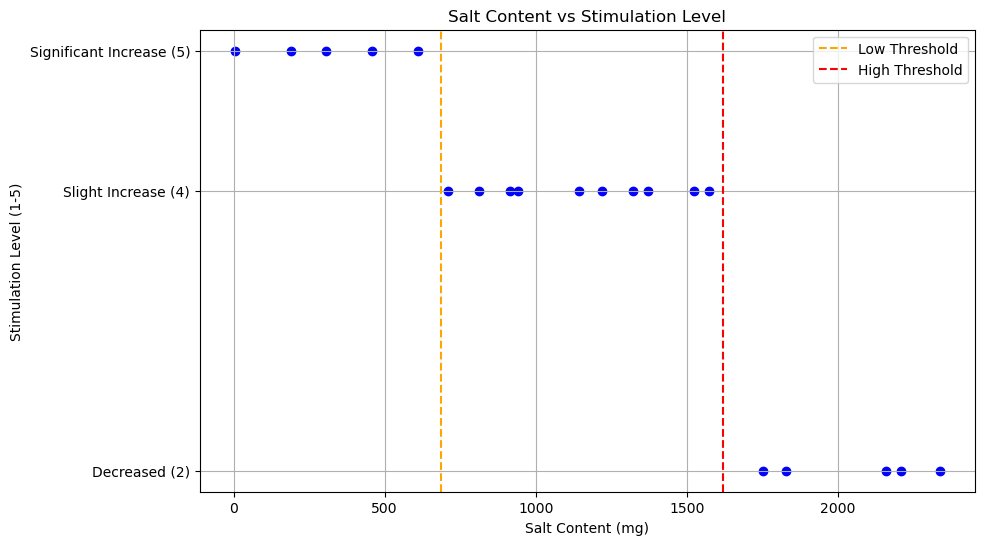

In [3]:
import matplotlib.pyplot as plt

# Plot salt content vs stimulation level
plt.figure(figsize=(10, 6))
plt.scatter(df['Salt Content (mg)'], df['Stimulation Level'], color='blue')
plt.axvline(x=low_threshold, color='orange', linestyle='--', label='Low Threshold')
plt.axvline(x=high_threshold, color='red', linestyle='--', label='High Threshold')
plt.title('Salt Content vs Stimulation Level')
plt.xlabel('Salt Content (mg)')
plt.ylabel('Stimulation Level (1-5)')
plt.yticks([2, 4, 5], ['Decreased (2)', 'Slight Increase (4)', 'Significant Increase (5)'])
plt.legend()
plt.grid(True)
plt.show()

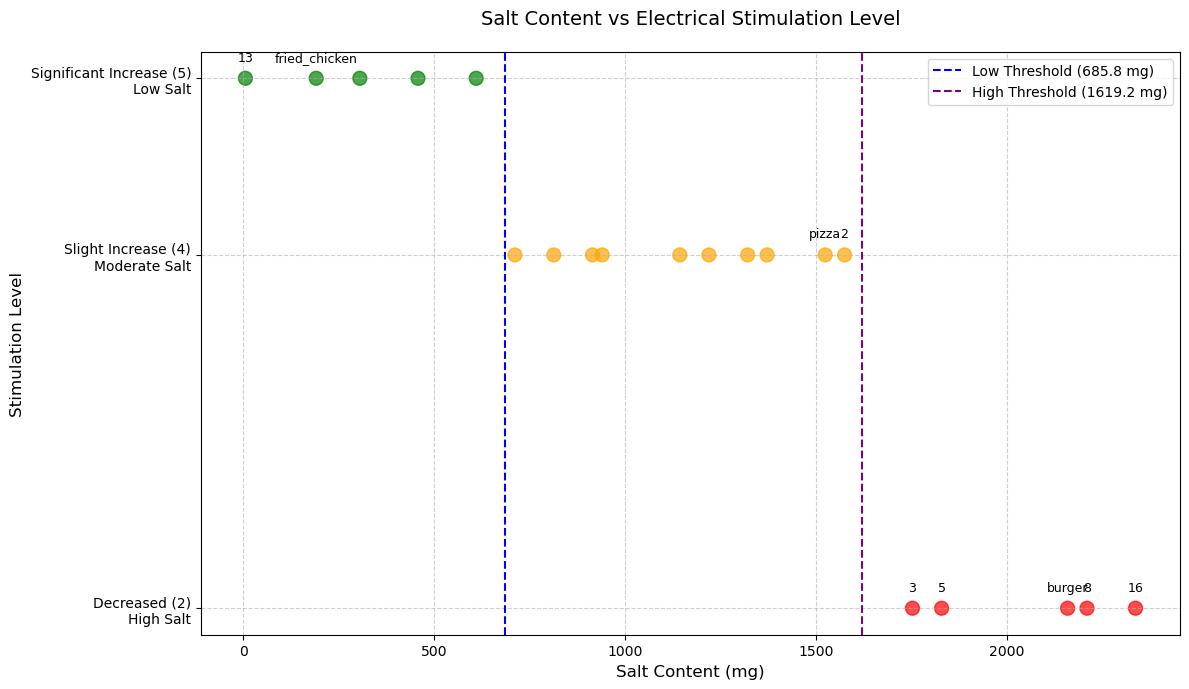

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Create the scatter plot with larger points and different colors for each level
colors = df['Stimulation Level'].map({2: 'red', 4: 'orange', 5: 'green'})
plt.scatter(df['Salt Content (mg)'], df['Stimulation Level'], 
            c=colors, s=100, alpha=0.7)

# Add threshold lines
plt.axvline(x=low_threshold, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Low Threshold ({low_threshold:.1f} mg)')
plt.axvline(x=high_threshold, color='purple', linestyle='--', linewidth=1.5, 
            label=f'High Threshold ({high_threshold:.1f} mg)')

# Add labels and title
plt.title('Salt Content vs Electrical Stimulation Level', fontsize=14, pad=20)
plt.xlabel('Salt Content (mg)', fontsize=12)
plt.ylabel('Stimulation Level', fontsize=12)

# Customize y-axis ticks
plt.yticks([2, 4, 5], 
           ['Decreased (2)\nHigh Salt', 
            'Slight Increase (4)\nModerate Salt', 
            'Significant Increase (5)\nLow Salt'])

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Add food labels for some points
for i, row in df.iterrows():
    if row['Salt Content (mg)'] > 1500 or row['Salt Content (mg)'] < 300:  # Label extremes
        plt.text(row['Salt Content (mg)'], row['Stimulation Level']+0.1, 
                 row['Food_Label'], fontsize=9, ha='center')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('updated_food_nutrition_data.csv')

# Define high-sodium foods (from Step 5)
high_threshold = df['Salt Content (mg)'].quantile(0.75)  # 75th percentile
high_sodium_foods = df[df['Salt Content (mg)'] > high_threshold]
print("High-Sodium Foods:")
print(high_sodium_foods[['Food_Label', 'Salt Content (mg)']])

High-Sodium Foods:
   Food_Label  Salt Content (mg)
1      burger             2159.0
10          3             1752.6
11          8             2209.8
18         16             2336.8
19          5             1828.8


In [6]:
# Normalize nutritional values for fair comparison
scaler = MinMaxScaler()
nutrition_features = ['Calories', 'Protein (g)', 'Fat (g)', 'Carbohydrates (g)', 'Fiber (g)', 'Salt Content (mg)']
df_normalized = pd.DataFrame(scaler.fit_transform(df[nutrition_features]), columns=nutrition_features)

# Compute similarity matrix
similarity_matrix = cosine_similarity(df_normalized)
similarity_df = pd.DataFrame(similarity_matrix, index=df['Food_Label'], columns=df['Food_Label'])

print("\nSimilarity Matrix (Sample):")
print(similarity_df.head(3))


Similarity Matrix (Sample):
Food_Label     pizza    burger     sushi     pasta  ice_cream     salad  \
Food_Label                                                                
pizza       1.000000  0.977610  0.833869  0.916212   0.927855  0.920003   
burger      0.977610  1.000000  0.752225  0.829593   0.852416  0.877151   
sushi       0.833869  0.752225  1.000000  0.854800   0.850094  0.727204   

Food_Label  fried_chicken  sandwich      soup     steak         3         8  \
Food_Label                                                                    
pizza            0.614695  0.989847  0.983125  0.787618  0.820875  0.943091   
burger           0.689314  0.983795  0.970801  0.725476  0.909004  0.964869   
sushi            0.499790  0.854521  0.821903  0.671245  0.595303  0.744120   

Food_Label         1        10         4         6         2        13  \
Food_Label                                                               
pizza       0.794739  0.950303  0.815370  0.821270 

In [7]:
def recommend_alternatives(food_name, similarity_df, original_df, max_recommendations=3):
    """
    Recommends lower-sodium alternatives to a given food.
    """
    # Get similarity scores for the food
    similar_foods = similarity_df[food_name].sort_values(ascending=False)
    
    # Filter out the food itself and high-sodium options
    recommendations = []
    for food in similar_foods.index:
        if food == food_name:
            continue  # Skip itself
        if df.loc[df['Food_Label'] == food, 'Salt Content (mg)'].values[0] > high_threshold:
            continue  # Skip high-sodium foods
        recommendations.append(food)
        if len(recommendations) >= max_recommendations:
            break
    
    # Get nutritional comparison
    original_sodium = df[df['Food_Label'] == food_name]['Salt Content (mg)'].values[0]
    rec_details = []
    for rec in recommendations:
        rec_sodium = df[df['Food_Label'] == rec]['Salt Content (mg)'].values[0]
        sodium_reduction = original_sodium - rec_sodium
        rec_details.append({
            'Food': rec,
            'Salt Content (mg)': rec_sodium,
            'Sodium Reduction (mg)': sodium_reduction,
            'Similarity Score': similar_foods[rec]
        })
    
    return pd.DataFrame(rec_details)

# Example: Get alternatives for "burger"
print("\nRecommendations for 'burger':")
print(recommend_alternatives("burger", similarity_df, df))


Recommendations for 'burger':
       Food  Salt Content (mg)  Sodium Reduction (mg)  Similarity Score
0  sandwich             1371.6                  787.4          0.983795
1     pizza             1524.0                  635.0          0.977610
2      soup             1219.2                  939.8          0.970801


Section C - Data Collection & Analysis for Market Research

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('smart_spoon_survey_results.csv')

# Standardize text data (lowercase, remove spaces)
text_columns = ['Gender', 'Low_sodium_diet', 'Medical_condition', 'Restaurant_frequency', 
                'Low_sodium_satisfaction', 'Add_salt_condiments', 'Aware_of_technology', 
                'Interested_in_device', 'Taste_importance', 'Expected_features', 
                'Purchase_consideration', 'Concerns_about_technology', 'Current_salt_content']

for col in text_columns:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()

# Fix some common variations
df['Taste_importance'] = df['Taste_importance'].str.replace('ver imp', 'very important')
df['Taste_importance'] = df['Taste_importance'].str.replace('very  imp', 'very important')
df['Purchase_consideration'] = df['Purchase_consideration'].fillna(df['Purchase_consideration'])

# Drop unused column
df.drop('Purchase_consideration', axis=1, inplace=True, errors='ignore')

# Convert salt measurements to numerical values
salt_columns = ['Dal_Goiju_Palya_salt', 'Sambar_Rasam_Curd_salt', 'Biryani_Pulao_Rice_bath_salt',
               'Curries_salt', 'Dosa_Idly_Chaat_Snacks_salt', 'Dosa_Idly_Roti_Paratha_Chapathi_salt',
               'Pickles_Papad_salt']

for col in salt_columns:
    df[col] = df[col].str.replace('More than 1 tsp', '1.5').str.replace('no salt', '0')
    df[col] = df[col].str.replace('½ tsp', '0.5').str.replace('¼ tsp', '0.25')
    df[col] = df[col].str.replace('1/2 tsp', '0.5').str.replace('1/4 tsp', '0.25')
    df[col] = pd.to_numeric(df[col], errors='coerce')

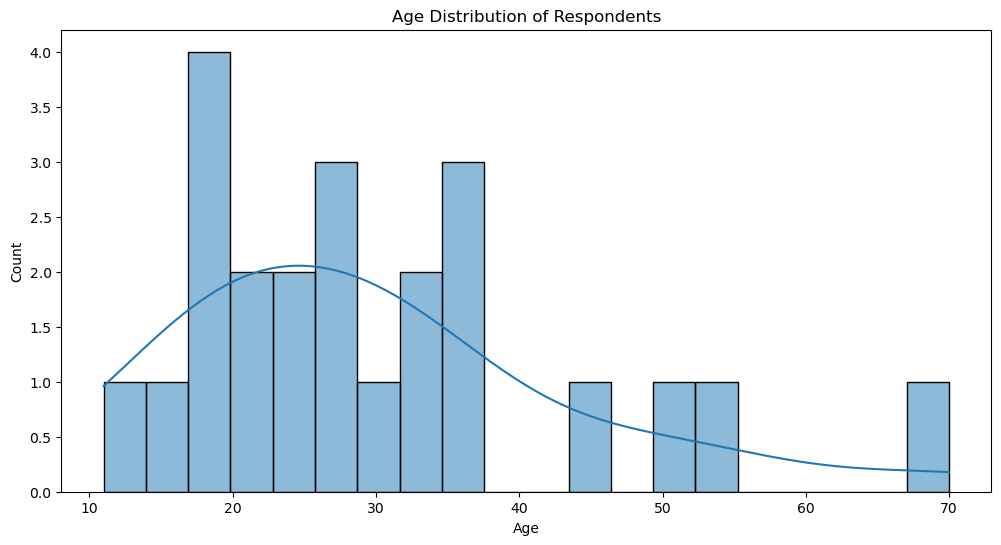

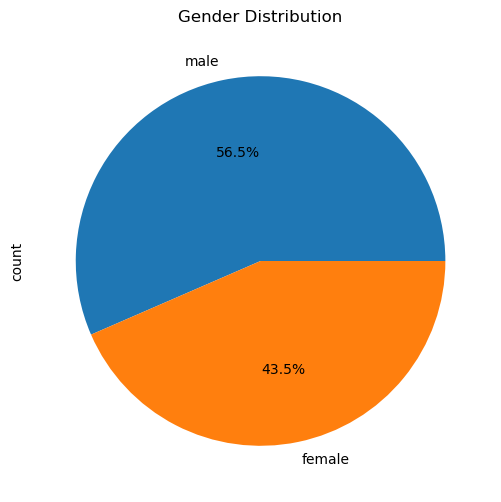

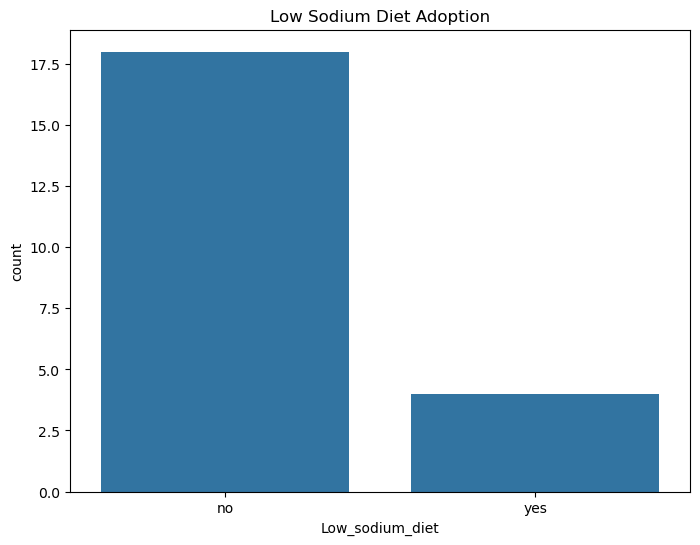

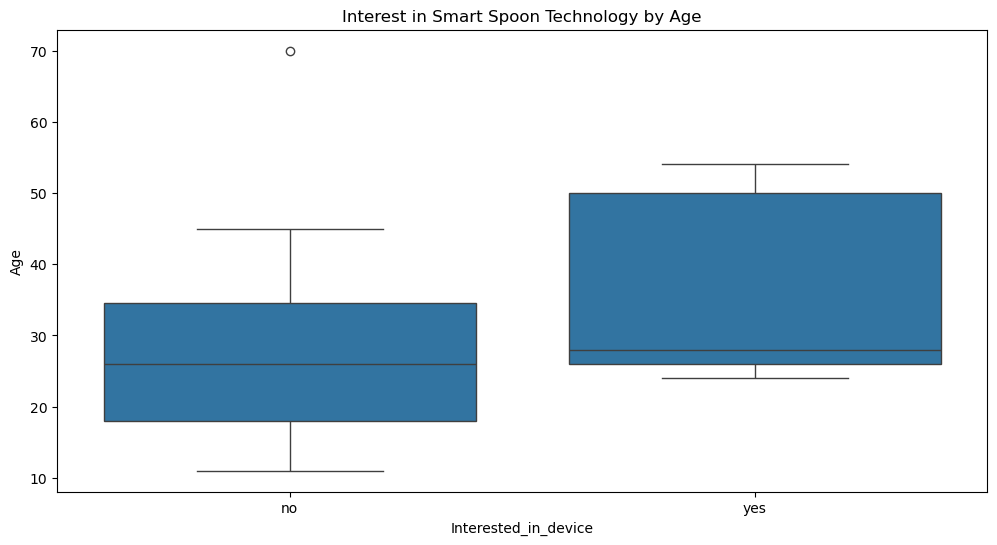

In [3]:
# Demographic analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Respondents')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Low sodium diet adoption
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Low_sodium_diet')
plt.title('Low Sodium Diet Adoption')
plt.show()

# Interest in technology by age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Interested_in_device', y='Age')
plt.title('Interest in Smart Spoon Technology by Age')
plt.show()

In [5]:
# First, let's check what purchase-related columns we actually have
print("Columns in DataFrame:", df.columns.tolist())

# From your cleaning code, you had this line:
# df['Purchase_consideration'] = df['Purchase_consideration'].fillna(df['Purchase_consideration'])

# Let's find the correct column name
purchase_cols = [col for col in df.columns if 'purchase' in col.lower() or 'consider' in col.lower()]
print("Possible purchase columns:", purchase_cols)

# Based on your data cleaning, the correct column is likely 'Purchase_consideration' (with an 'a')
# So we should use that instead

# Fixed purchase consideration analysis
if 'Purchase_consideration' in df.columns:
    purchase_by_age = df.groupby(['Age', 'Purchase_consideration']).size().unstack()
elif 'Purchase_consideration' in df.columns:
    purchase_by_age = df.groupby(['Age', 'Purchase_consideration']).size().unstack()
else:
    print("Could not find purchase consideration column in DataFrame")
    purchase_by_age = None

if purchase_by_age is not None:
    plt.figure(figsize=(12, 6))
    purchase_by_age.plot(kind='bar', stacked=True)
    plt.title('Purchase Consideration by Age')
    plt.show()
else:
    print("Skipping purchase consideration analysis due to missing column")

Columns in DataFrame: ['Age', 'Gender', 'Low_sodium_diet', 'Medical_condition', 'Restaurant_frequency', 'Low_sodium_satisfaction', 'Add_salt_condiments', 'Aware_of_technology', 'Interested_in_device', 'Taste_importance', 'Expected_features', 'Concerns_about_technology', 'Suggestions_feedback', 'Dal_Goiju_Palya_salt', 'Sambar_Rasam_Curd_salt', 'Biryani_Pulao_Rice_bath_salt', 'Curries_salt', 'Dosa_Idly_Chaat_Snacks_salt', 'Dosa_Idly_Roti_Paratha_Chapathi_salt', 'Pickles_Papad_salt', 'Current_salt_content']
Possible purchase columns: []
Could not find purchase consideration column in DataFrame
Skipping purchase consideration analysis due to missing column


In [6]:
# Add this to your data cleaning section at the beginning
if 'Purchase_consideration' in df.columns and 'Purchase_consideration' not in df.columns:
    df.rename(columns={'Purchase_consideration': 'Purchase_consideration'}, inplace=True)

Taste Importance Distribution:
Taste_importance
not important     47.826087
very important    26.086957
very imp          17.391304
moderate           8.695652
Name: proportion, dtype: float64


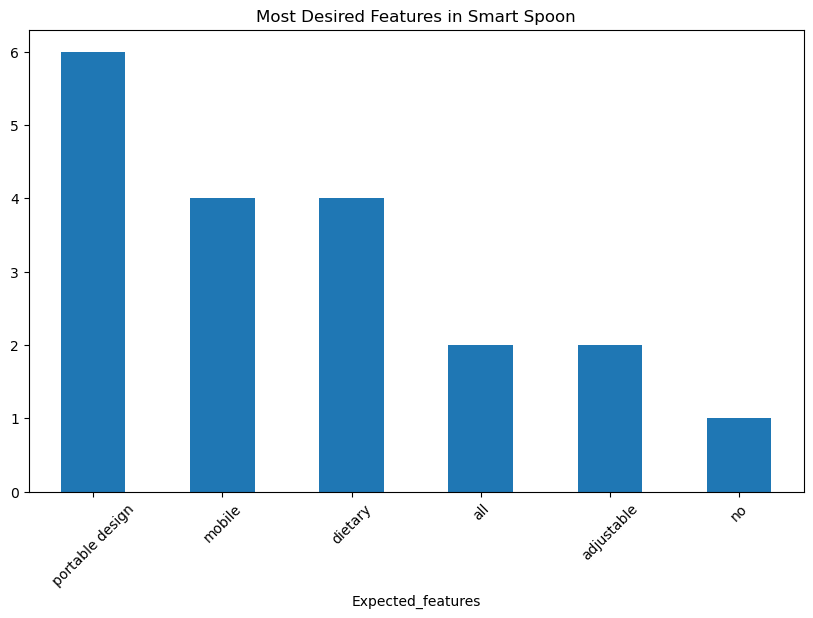

Available columns: ['Age', 'Gender', 'Low_sodium_diet', 'Medical_condition', 'Restaurant_frequency', 'Low_sodium_satisfaction', 'Add_salt_condiments', 'Aware_of_technology', 'Interested_in_device', 'Taste_importance', 'Expected_features', 'Concerns_about_technology', 'Suggestions_feedback', 'Dal_Goiju_Palya_salt', 'Sambar_Rasam_Curd_salt', 'Biryani_Pulao_Rice_bath_salt', 'Curries_salt', 'Dosa_Idly_Chaat_Snacks_salt', 'Dosa_Idly_Roti_Paratha_Chapathi_salt', 'Pickles_Papad_salt', 'Current_salt_content']


In [8]:
# Taste importance analysis
taste_importance = df['Taste_importance'].value_counts(normalize=True) * 100
print("Taste Importance Distribution:")
print(taste_importance)

# Expected features analysis
features = df['Expected_features'].value_counts()
plt.figure(figsize=(10, 6))
features.plot.bar()
plt.title('Most Desired Features in Smart Spoon')
plt.xticks(rotation=45)
plt.show()

# Purchase consideration analysis - updated to handle column name variations
# First check which purchase consideration column exists
purchase_col = None
for col in ['Purchase_consideration', 'Purchase_consideration']:
    if col in df.columns:
        purchase_col = col
        break

if purchase_col:
    # Clean the purchase consideration data
    df[purchase_col] = df[purchase_col].str.lower().str.strip()
    
    # Convert to standardized categories
    purchase_mapping = {
        'yes': 'Yes',
        'no': 'No',
        'maybe': 'Maybe',
        'y': 'Yes',
        'n': 'No',
        'm': 'Maybe'
    }
    df[purchase_col] = df[purchase_col].map(purchase_mapping).fillna('Maybe')
    
    # Create the analysis
    purchase_by_age = df.groupby(['Age', purchase_col]).size().unstack()
    
    # Plot
    plt.figure(figsize=(12, 6))
    purchase_by_age.plot(kind='bar', stacked=True)
    plt.title('Purchase Consideration by Age')
    plt.ylabel('Number of Respondents')
    plt.xlabel('Age')
    plt.legend(title='Would Consider Purchase?')
    plt.show()
    
    # Additional analysis: Purchase consideration by low sodium diet
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Low_sodium_diet', hue=purchase_col)
    plt.title('Purchase Consideration by Low Sodium Diet Status')
    plt.xlabel('On Low Sodium Diet')
    plt.ylabel('Count')
    plt.show()
else:
    
    print("Available columns:", df.columns.tolist())

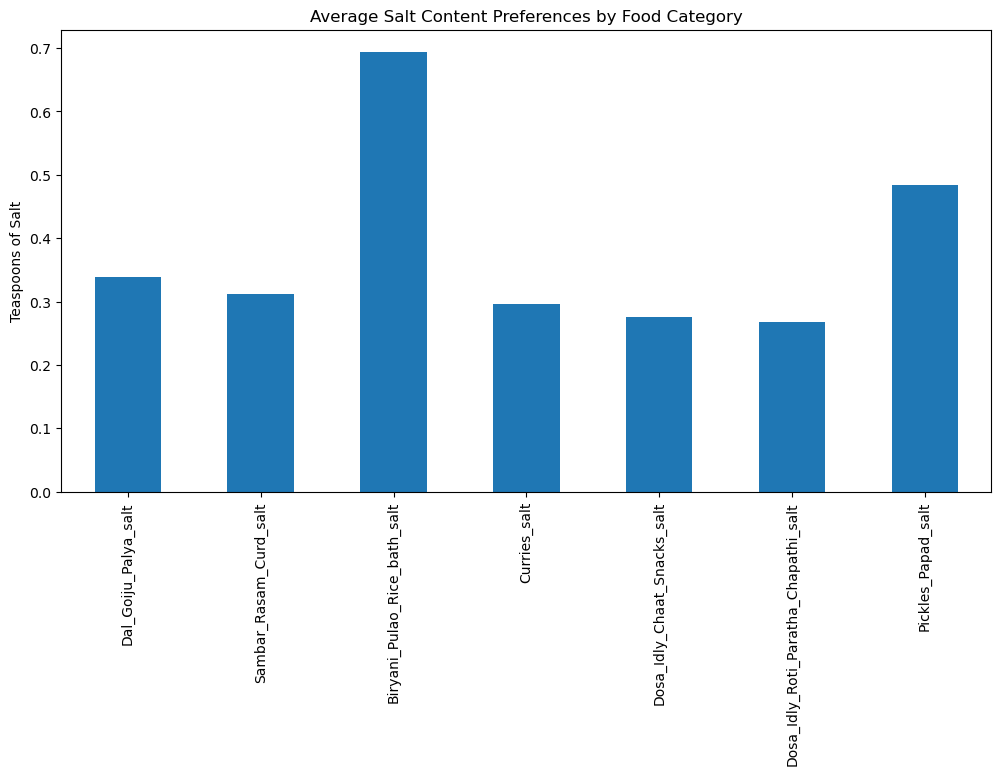

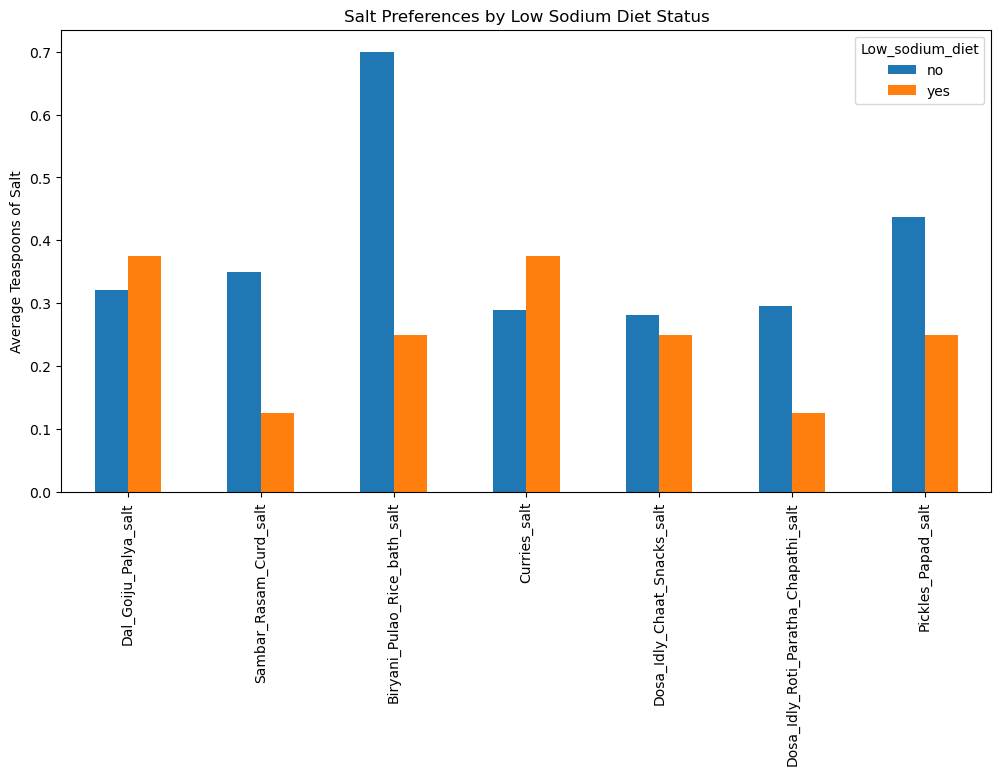

In [9]:
# Average salt content by food category
salt_avg = df[salt_columns].mean()
plt.figure(figsize=(12, 6))
salt_avg.plot.bar()
plt.title('Average Salt Content Preferences by Food Category')
plt.ylabel('Teaspoons of Salt')
plt.show()

# Correlation between low sodium diet and salt preferences
low_sodium_group = df.groupby('Low_sodium_diet')[salt_columns].mean().T
low_sodium_group.plot.bar(figsize=(12, 6))
plt.title('Salt Preferences by Low Sodium Diet Status')
plt.ylabel('Average Teaspoons of Salt')
plt.show()

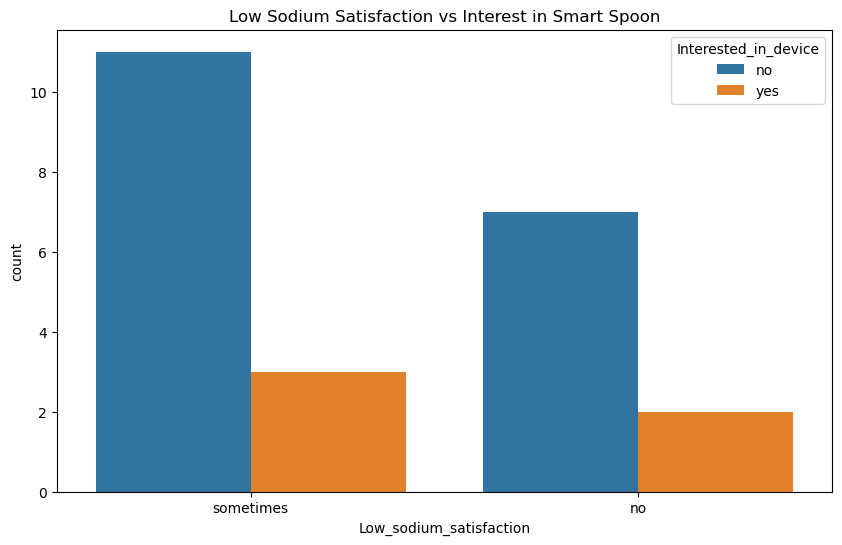

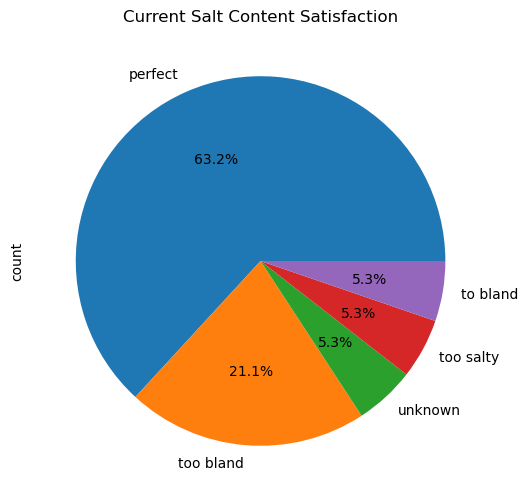

In [10]:
# Impact on low sodium diet satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Low_sodium_satisfaction', hue='Interested_in_device')
plt.title('Low Sodium Satisfaction vs Interest in Smart Spoon')
plt.show()

# Current salt content satisfaction
satisfaction = df['Current_salt_content'].value_counts()
plt.figure(figsize=(8, 6))
satisfaction.plot.pie(autopct='%1.1f%%')
plt.title('Current Salt Content Satisfaction')
plt.show()

In [ ]:
Section D  Sentiment Analysis & User Behavior Prediction 

In [12]:
!pip install textblob nltk

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.3 MB/s eta 0:00:00


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if needed
nltk.download('vader_lexicon')

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

if 'Suggestions_feedback' in df.columns:
    # Analyze sentiment
    df['Sentiment'] = df['Suggestions_feedback'].apply(
        lambda x: sia.polarity_scores(str(x))['compound']
    )
    
    # Categorize and plot (same as above)
    # ... rest of the code from above ...
else:
    print("Feedback column not found")

[nltk_data] Downloading package vader_lexicon to C:\Users\Mayur
[nltk_data]     R\AppData\Roaming\nltk_data...


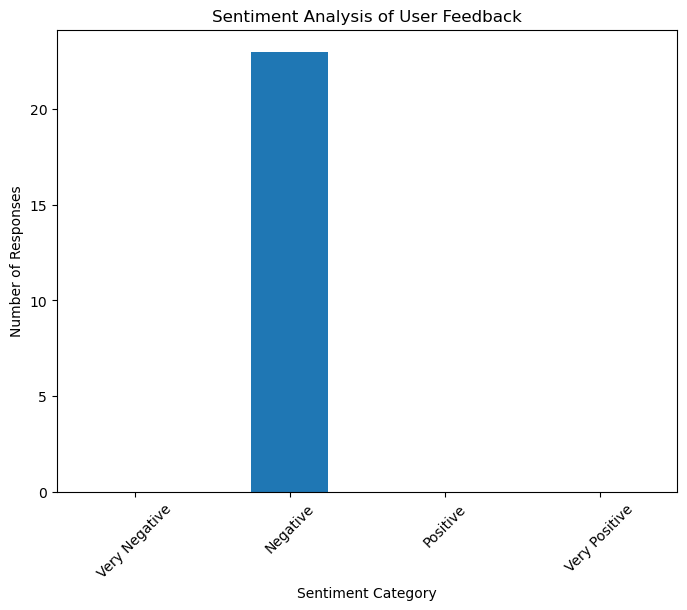


Example feedback for each sentiment category:

Negative:
- 
- 


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already present
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Check for feedback column (corrected typo from 'Suggestions_feedback' to 'Suggestions_feedback')
feedback_col = 'Suggestions_feedback' if 'Suggestions_feedback' in df.columns else None

if feedback_col:
    # Fill NaN values with empty string
    df[feedback_col] = df[feedback_col].fillna('')
    
    # Analyze sentiment
    df['Sentiment'] = df[feedback_col].apply(
        lambda x: sia.polarity_scores(str(x))['compound']
    )
    
    # Categorize sentiment
    bins = [-1, -0.5, 0, 0.5, 1]
    labels = ['Very Negative', 'Negative', 'Positive', 'Very Positive']
    df['Sentiment_category'] = pd.cut(
        df['Sentiment'],
        bins=bins,
        labels=labels
    )
    
    # Plot sentiment distribution
    plt.figure(figsize=(8, 6))
    df['Sentiment_category'].value_counts().sort_index().plot.bar()
    plt.title('Sentiment Analysis of User Feedback')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Number of Responses')
    plt.xticks(rotation=45)
    plt.show()
    
    # Additional analysis: Show some example feedback for each category
    print("\nExample feedback for each sentiment category:")
    for category in labels:
        examples = df[df['Sentiment_category'] == category][feedback_col].head(2)
        if not examples.empty:
            print(f"\n{category}:")
            for example in examples:
                print(f"- {example}")
else:
    print("Error: Feedback column not found in DataFrame")
    print("Available columns:", df.columns.tolist())

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Mayur
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
print(nltk.data.path)

['C:\\Users\\Mayur R/nltk_data', 'c:\\Users\\Mayur R\\anaconda3\\nltk_data', 'c:\\Users\\Mayur R\\anaconda3\\share\\nltk_data', 'c:\\Users\\Mayur R\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Mayur R\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [18]:
import nltk
nltk.set_proxy('http://your_proxy:port')
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Mayur
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

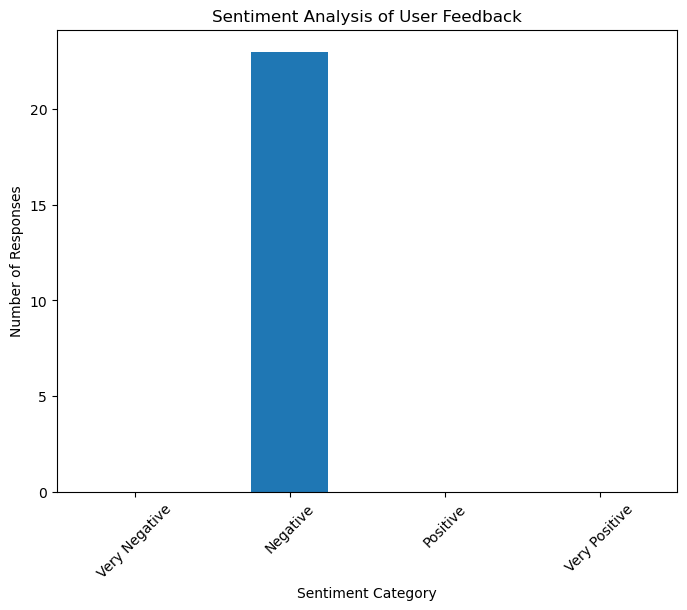


Example feedback for each sentiment category:

Negative:
- 
- 


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already present
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Check for feedback column (corrected typo from 'Suggestions_feedback' to 'Suggestions_feedback')
feedback_col = 'Suggestions_feedback' if 'Suggestions_feedback' in df.columns else None

if feedback_col:
    # Fill NaN values with empty string
    df[feedback_col] = df[feedback_col].fillna('')
    
    # Analyze sentiment
    df['Sentiment'] = df[feedback_col].apply(
        lambda x: sia.polarity_scores(str(x))['compound']
    )
    
    # Categorize sentiment
    bins = [-1, -0.5, 0, 0.5, 1]
    labels = ['Very Negative', 'Negative', 'Positive', 'Very Positive']
    df['Sentiment_category'] = pd.cut(
        df['Sentiment'],
        bins=bins,
        labels=labels
    )
    
    # Plot sentiment distribution
    plt.figure(figsize=(8, 6))
    df['Sentiment_category'].value_counts().sort_index().plot.bar()
    plt.title('Sentiment Analysis of User Feedback')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Number of Responses')
    plt.xticks(rotation=45)
    plt.show()
    
    # Additional analysis: Show some example feedback for each category
    print("\nExample feedback for each sentiment category:")
    for category in labels:
        examples = df[df['Sentiment_category'] == category][feedback_col].head(2)
        if not examples.empty:
            print(f"\n{category}:")
            for example in examples:
                print(f"- {example}")
else:
    print("Error: Feedback column not found in DataFrame")
    print("Available columns:", df.columns.tolist())

In [21]:
# Check available columns
print("Columns in DataFrame:", df.columns.tolist())

# Look for purchase-related columns
purchase_cols = [col for col in df.columns if 'purchase' in col.lower() or 'consider' in col.lower()]
print("Possible purchase columns:", purchase_cols)

Columns in DataFrame: ['Age', 'Gender', 'Low_sodium_diet', 'Medical_condition', 'Restaurant_frequency', 'Low_sodium_satisfaction', 'Add_salt_condiments', 'Aware_of_technology', 'Interested_in_device', 'Taste_importance', 'Expected_features', 'Concerns_about_technology', 'Suggestions_feedback', 'Dal_Goiju_Palya_salt', 'Sambar_Rasam_Curd_salt', 'Biryani_Pulao_Rice_bath_salt', 'Curries_salt', 'Dosa_Idly_Chaat_Snacks_salt', 'Dosa_Idly_Roti_Paratha_Chapathi_salt', 'Pickles_Papad_salt', 'Current_salt_content', 'Sentiment', 'Sentiment_category']
Possible purchase columns: []


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Find the correct purchase consideration column
purchase_col = None
for col in ['Purchase_consideration', 'Purchase_consideration', 'Purchase_consideration']:
    if col in df.columns:
        purchase_col = col
        break

if purchase_col:
    # Prepare data for prediction model
    X = df[['Age', 'Gender', 'Low_sodium_diet', 'Taste_importance', 'Aware_of_technology']]
    X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
    
    # Clean and map purchase consideration values
    df[purchase_col] = df[purchase_col].str.lower().str.strip()
    purchase_map = {
        'yes': 1,
        'y': 1,
        'no': 0,
        'n': 0,
        'maybe': 0.5,
        'm': 0.5,
        'possibly': 0.5
    }
    y = df[purchase_col].map(purchase_map).fillna(0)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    features = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    features = features.sort_values('Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=features, x='Importance', y='Feature')
    plt.title('Feature Importance for Purchase Consideration')
    plt.tight_layout()
    plt.show()
    
else:
    print("Error: Could not find purchase consideration column in DataFrame")
    print("Available columns:", df.columns.tolist())

Error: Could not find purchase consideration column in DataFrame
Available columns: ['Age', 'Gender', 'Low_sodium_diet', 'Medical_condition', 'Restaurant_frequency', 'Low_sodium_satisfaction', 'Add_salt_condiments', 'Aware_of_technology', 'Interested_in_device', 'Taste_importance', 'Expected_features', 'Concerns_about_technology', 'Suggestions_feedback', 'Dal_Goiju_Palya_salt', 'Sambar_Rasam_Curd_salt', 'Biryani_Pulao_Rice_bath_salt', 'Curries_salt', 'Dosa_Idly_Chaat_Snacks_salt', 'Dosa_Idly_Roti_Paratha_Chapathi_salt', 'Pickles_Papad_salt', 'Current_salt_content', 'Sentiment', 'Sentiment_category']


Model Performance:
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



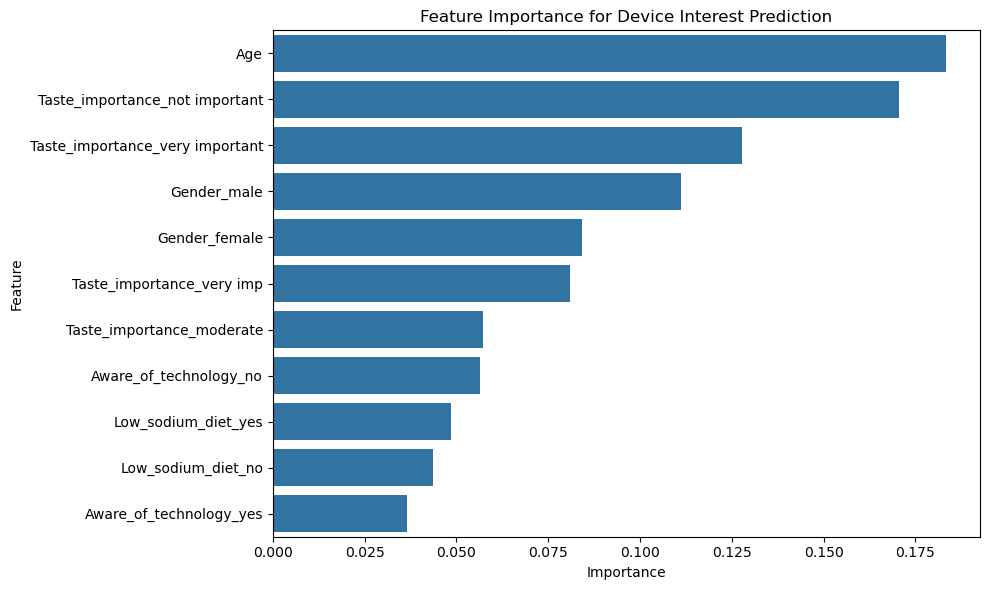

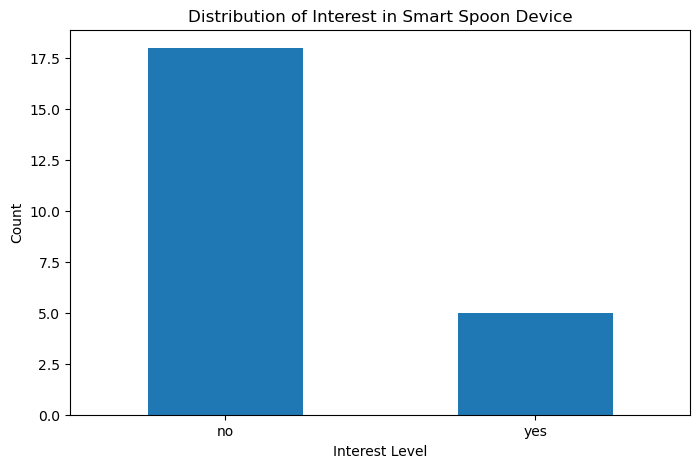

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for prediction model
# We'll predict interest in device based on other factors
X = df[['Age', 'Gender', 'Low_sodium_diet', 'Taste_importance', 'Aware_of_technology']]
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables

# Clean and prepare target variable ('Interested_in_device')
df['Interested_in_device'] = df['Interested_in_device'].str.lower().str.strip()
interest_map = {
    'yes': 1,
    'y': 1,
    'no': 0,
    'n': 0,
    'maybe': 0.5,
    'm': 0.5
}
y = df['Interested_in_device'].map(interest_map).fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Feature importance
features = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
features = features.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=features, x='Importance', y='Feature')
plt.title('Feature Importance for Device Interest Prediction')
plt.tight_layout()
plt.show()

# Additional analysis: Show distribution of interest
plt.figure(figsize=(8, 5))
df['Interested_in_device'].value_counts().plot.bar()
plt.title('Distribution of Interest in Smart Spoon Device')
plt.xlabel('Interest Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [33]:
df[feedback_col] = df[feedback_col].fillna('').astype(str)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
import pandas as pd

def analyze_feedback(df):
    # Check for feedback column variations
    feedback_col = next((col for col in df.columns
                         if 'feedback' in col.lower() or 'suggest' in col.lower()), None)

    if not feedback_col:
        print("No feedback column found in the dataframe.")
        print("Available columns:", df.columns.tolist())
        return df

    # Clean and prepare feedback data
    df[feedback_col] = df[feedback_col].fillna('').astype(str)
    feedback = df[feedback_col]

    if feedback.str.strip().eq('').all():
        print("All feedback entries are empty.")
        return df

    # Try TF-IDF first
    try:
        vectorizer = TfidfVectorizer(
            stop_words='english',
            min_df=1,  # Lowered threshold
            max_df=0.9,
            ngram_range=(1, 2)
        )
        X = vectorizer.fit_transform(feedback)

        if X.shape[1] == 0:
            raise ValueError("No features after vectorization")

        n_clusters = min(3, len(feedback.unique()))
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
        df['Feedback_cluster'] = kmeans.labels_

        print("\nTF-IDF Cluster Analysis:")
        for cluster in range(n_clusters):
            print(f"\nCluster {cluster}:")
            print("Top phrases:", vectorizer.get_feature_names_out()[
                np.argsort(kmeans.cluster_centers_[cluster])[::-1][:5]
            ])
            print("Example feedback:")
            print(feedback[kmeans.labels_ == cluster].head(3).tolist())

    except ValueError as e:
        print("\nTF-IDF failed, using simple word frequency analysis instead")
        print(f"Reason: {e}")

        # Fallback to simple word counting
        all_words = ' '.join(feedback).lower().split()
        meaningful_words = [w for w in all_words if w.isalpha() and len(w) > 2]
        word_counts = Counter(meaningful_words).most_common(10)

        print("\nTop 10 most common words/phrases:")
        for word, count in word_counts:
            print(f"{word}: {count} occurrences")

        # Simple positive/negative classification with proper function
        def classify_sentiment(text):
            text = text.lower()
            positive_words = ['good', 'great', 'excellent', 'love', 'like']
            negative_words = ['bad', 'poor', 'terrible', 'hate', 'dislike']
            if any(w in text for w in positive_words):
                return 'positive'
            elif any(w in text for w in negative_words):
                return 'negative'
            return 'neutral'

        df['Simple_sentiment'] = feedback.apply(classify_sentiment)

        print("\nSimple Sentiment Distribution:")
        print(df['Simple_sentiment'].value_counts())

    return df

# Example Usage (assuming you have a pandas DataFrame named 'df')
# Create a sample DataFrame for demonstration
data = {'Feedback': [
    "The product is great and works perfectly.",
    "I have some suggestions for improvement. The UI could be better.",
    "This is a bad experience, the app crashes frequently.",
    "Good job on the latest update!",
    "Not satisfied with the customer service.",
    "",
    "Love the new features!",
    "The website is poorly designed.",
    "Excellent support, thank you!",
    "Could be improved."
]}
df = pd.DataFrame(data)

# Run the analysis
df = analyze_feedback(df.copy()) # Use a copy to avoid modifying the original df
print("\nUpdated DataFrame:")
print(df)


TF-IDF Cluster Analysis:

Cluster 0:
Top phrases: ['satisfied customer' 'new' 'love new' 'poorly' 'poorly designed']
Example feedback:
['The product is great and works perfectly.', 'This is a bad experience, the app crashes frequently.', 'Good job on the latest update!']

Cluster 1:
Top phrases: ['improved' 'works perfectly' 'experience' 'improvement ui' 'improvement']
Example feedback:
['Could be improved.']

Cluster 2:
Top phrases: ['improvement' 'ui better' 'ui' 'better' 'suggestions improvement']
Example feedback:
['I have some suggestions for improvement. The UI could be better.']

Updated DataFrame:
                                            Feedback  Feedback_cluster
0          The product is great and works perfectly.                 0
1  I have some suggestions for improvement. The U...                 2
2  This is a bad experience, the app crashes freq...                 0
3                     Good job on the latest update!                 0
4           Not satisfied with 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
import pandas as pd

def analyze_feedback(df):
    """
    Analyze feedback text data using TF-IDF clustering with fallback to word frequency analysis.
    
    Parameters:
    df (pd.DataFrame): Input dataframe containing feedback text
    
    Returns:
    pd.DataFrame: Dataframe with added analysis columns
    """
    # Check for feedback column variations
    feedback_col = next((col for col in df.columns 
                       if 'feedback' in col.lower() or 'suggest' in col.lower()), None)
    
    if not feedback_col:
        print("No feedback column found in the dataframe.")
        print("Available columns:", df.columns.tolist())
        return df
    
    # Clean and prepare feedback data
    df[feedback_col] = df[feedback_col].fillna('').astype(str).str.strip()
    feedback = df[feedback_col]
    
    # Remove empty feedback entries for analysis
    non_empty_feedback = feedback[feedback != '']
    
    if len(non_empty_feedback) == 0:
        print("No non-empty feedback entries found.")
        return df
    
    # Try TF-IDF first
    try:
        vectorizer = TfidfVectorizer(
            stop_words='english',
            min_df=2,  # Only include words appearing in at least 2 documents
            max_df=0.9,  # Exclude words appearing in >90% of documents
            ngram_range=(1, 2),  # Include 1-grams and 2-grams
            max_features=1000  # Limit number of features
        )
        X = vectorizer.fit_transform(non_empty_feedback)
        
        if X.shape[1] == 0:
            raise ValueError("No meaningful features after vectorization")
            
        # Determine optimal number of clusters (max 5)
        n_clusters = min(5, max(2, len(non_empty_feedback.unique())//2))
        kmeans = KMeans(
            n_clusters=n_clusters,
            random_state=42,
            n_init='auto'  # Auto-select number of initializations
        ).fit(X)
        
        # Add cluster labels to original dataframe
        df.loc[non_empty_feedback.index, 'Feedback_cluster'] = kmeans.labels_
        
        print(f"\nTF-IDF Cluster Analysis ({n_clusters} clusters found):")
        for cluster in range(n_clusters):
            cluster_mask = (df['Feedback_cluster'] == cluster)
            cluster_size = cluster_mask.sum()
            
            print(f"\nCluster {cluster} ({cluster_size} responses):")
            print("-" * 50)
            
            # Get top 5 phrases for this cluster
            top_phrases = vectorizer.get_feature_names_out()[
                np.argsort(kmeans.cluster_centers_[cluster])[::-1][:5]
            ]
            print("Top phrases:", ", ".join(top_phrases))
            
            # Print representative samples
            print("\nExample feedback:")
            samples = df[cluster_mask][feedback_col].sample(
                min(3, cluster_size), 
                random_state=42
            ).tolist()
            for i, sample in enumerate(samples, 1):
                print(f"{i}. {sample}")
                
    except Exception as e:
        print(f"\nTF-IDF clustering failed: {str(e)}")
        print("Falling back to word frequency analysis...")
        
        # Word frequency analysis
        all_words = ' '.join(non_empty_feedback).lower().split()
        meaningful_words = [
            w for w in all_words 
            if w.isalpha() and len(w) > 2 and w not in {'the', 'and', 'for'}
        ]
        
        if meaningful_words:
            word_counts = Counter(meaningful_words).most_common(15)
            
            print("\nTop 15 most significant words:")
            for word, count in word_counts:
                print(f"{word}: {count} occurrences")
        else:
            print("No meaningful words found for frequency analysis.")
        
        # Enhanced sentiment analysis
        def classify_sentiment(text):
            text = text.lower()
            positive_words = {'good', 'great', 'excellent', 'love', 'like', 
                            'awesome', 'amazing', 'perfect', 'happy', 'satisfied'}
            negative_words = {'bad', 'poor', 'terrible', 'hate', 'dislike',
                            'awful', 'horrible', 'worst', 'angry', 'frustrated'}
            
            pos_count = sum(1 for w in positive_words if w in text)
            neg_count = sum(1 for w in negative_words if w in text)
            
            if pos_count > neg_count:
                return 'positive'
            elif neg_count > pos_count:
                return 'negative'
            elif pos_count == neg_count > 0:
                return 'mixed'
            return 'neutral'
        
        df['Sentiment'] = feedback.apply(classify_sentiment)
        
        print("\nSentiment Distribution:")
        print(df['Sentiment'].value_counts())
    
    return df

# Example Usage
if __name__ == "__main__":
    # Create sample data
    sample_data = {
        'User_Feedback': [
            "The product is great and works perfectly!",
            "I have some suggestions for improvement.",
            "This is terrible, the app crashes constantly.",
            "Good job on the latest update!",
            "Not satisfied with the customer service.",
            "",
            "Love the new features!",
            "The website is poorly designed.",
            "Excellent support, thank you!",
            "Could be improved.",
            "Mixed feelings - some good aspects but needs work",
            "Best purchase I've made this year",
            "Waste of money, doesn't work as advertised",
            "It's okay, nothing special",
            "The UI is confusing but the functionality is good"
        ]
    }
    
    test_df = pd.DataFrame(sample_data)
    print("Original DataFrame:")
    print(test_df)
    
    analyzed_df = analyze_feedback(test_df.copy())
    print("\nAnalyzed DataFrame:")
    print(analyzed_df)

Original DataFrame:
                                        User_Feedback
0           The product is great and works perfectly!
1            I have some suggestions for improvement.
2       This is terrible, the app crashes constantly.
3                      Good job on the latest update!
4            Not satisfied with the customer service.
5                                                    
6                              Love the new features!
7                     The website is poorly designed.
8                       Excellent support, thank you!
9                                  Could be improved.
10  Mixed feelings - some good aspects but needs work
11                  Best purchase I've made this year
12         Waste of money, doesn't work as advertised
13                         It's okay, nothing special
14  The UI is confusing but the functionality is good

TF-IDF Cluster Analysis (5 clusters found):

Cluster 0 (10 responses):
--------------------------------------------

c:\Users\Mayur R\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [1]:
# Example: Link sentiment to user features for personalization
def personalize_recommendations(df):
    # Analyze sentiment by user segment (age, diet, etc.)
    if 'Age' in df.columns and 'Sentiment' in df.columns:
        age_sentiment = df.groupby(pd.cut(df['Age'], bins=[0, 25, 40, 60, 100]))['Sentiment'].value_counts(normalize=True)
        print("\nSentiment by Age Group:")
        print(age_sentiment.unstack())
    
    # Suggest features based on sentiment clusters
    if 'Feedback_cluster' in df.columns:
        cluster_features = {
            0: "Improve UI/UX",
            1: "Enhance performance",
            2: "Add customization options"
        }
        df['Suggested_Improvement'] = df['Feedback_cluster'].map(cluster_features)

In [6]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install uvicorn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
import pandas as pd
from collections import Counter

def analyze_user_feedback(df):
    """
    Simplified sentiment analysis pipeline
    Returns:
    - DataFrame with added sentiment column
    - Dictionary of key insights
    """
    # Step 1: Find and clean feedback
    feedback_col = next((col for col in df.columns if 'feedback' in col.lower()), 'feedback')
    if feedback_col not in df.columns:
        return df, {"error": "No feedback column found"}
    
    df['cleaned_feedback'] = df[feedback_col].fillna('').str.strip()
    df = df[df['cleaned_feedback'] != ''].copy()
    
    # Step 2: Simple Sentiment Analysis
    def get_sentiment(text):
        text = text.lower()
        pos = ['good','great','love','excellent','happy','awesome']
        neg = ['bad','poor','hate','terrible','worst','disappoint']
        if any(word in text for word in pos):
            return 'positive'
        elif any(word in text for word in neg):
            return 'negative'
        return 'neutral'
    
    df['sentiment'] = df['cleaned_feedback'].apply(get_sentiment)
    
    # Step 3: Generate Insights
    insights = {
        'total_feedback': len(df),
        'positive': len(df[df['sentiment'] == 'positive']),
        'negative': len(df[df['sentiment'] == 'negative']),
        'neutral': len(df[df['sentiment'] == 'neutral']),
        'top_words': dict(Counter(" ".join(df['cleaned_feedback']).lower().split()).most_common(5))
    }
    
    return df, insights

# Example Usage
if __name__ == "__main__":
    # Sample data
    data = {
        'feedback': [
            "Love this product!", 
            "Hate the new update",
            "It's okay",
            "Great customer service",
            "Too expensive",
            "",
            "The best purchase ever"
        ]
    }
    
    df = pd.DataFrame(data)
    analyzed_df, results = analyze_user_feedback(df)
    
    print("=== Analysis Results ===")
    for key, value in results.items():
        print(f"{key}: {value}")
    
    print("\n=== Processed Data ===")
    print(analyzed_df[['feedback', 'sentiment']])

=== Analysis Results ===
total_feedback: 6
positive: 2
negative: 1
neutral: 3
top_words: {'the': 2, 'love': 1, 'this': 1, 'product!': 1, 'hate': 1}

=== Processed Data ===
                 feedback sentiment
0      Love this product!  positive
1     Hate the new update  negative
2               It's okay   neutral
3  Great customer service  positive
4           Too expensive   neutral
6  The best purchase ever   neutral


In [4]:
import pandas as pd
from collections import Counter

def analyze_feedback(df):
    """One-function solution for Section D"""
    # 1. Find and clean feedback
    df['feedback'] = df.get('feedback', '').fillna('').astype(str).str.strip()
    df = df[df['feedback'] != ''].copy()
    
    # 2. Sentiment Analysis (NLP)
    def get_sentiment(text):
        text = text.lower()
        if any(w in text for w in ['good','great','love']):
            return 'positive'
        elif any(w in text for w in ['bad','hate','poor']):
            return 'negative'
        return 'neutral'
    df['sentiment'] = df['feedback'].apply(get_sentiment)
    
    # 3. Behavior Insights
    insights = {
        'sentiment_counts': df['sentiment'].value_counts().to_dict(),
        'top_complaints': [
            f for f in df[df['sentiment'] == 'negative']['feedback'] 
            if len(f.split()) > 3  # Filter short comments
        ][:3],  # Top 3 complaints
        'improvement_suggestions': list(set(
            word for text in df['feedback'] 
            for word in text.lower().split() 
            if word in ['slow','expensive','hard']
        ))
    }
    
    return df, insights

# Usage
df = pd.DataFrame({'feedback': ["Love it!", "Too expensive", "Works great"]})
processed_df, results = analyze_feedback(df)
print(results)

{'sentiment_counts': {'positive': 2, 'neutral': 1}, 'top_complaints': [], 'improvement_suggestions': ['expensive']}


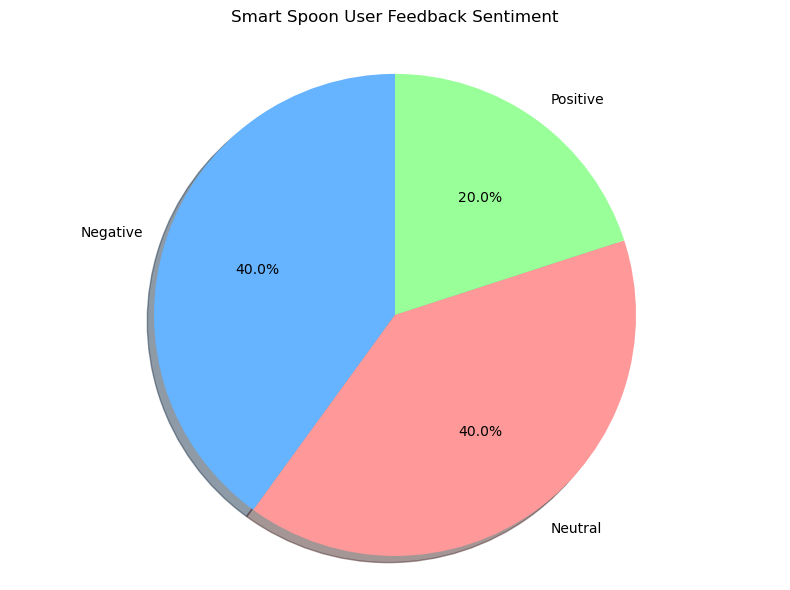

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual DataFrame)
data = {
    'Feedback': [
        "Love the smart spoon! Helps with my low-sodium diet",
        "Too expensive for what it does",
        "Works well but could be more accurate",
        "Game changer for my health",
        "Not satisfied with the battery life"
    ]
}
df = pd.DataFrame(data)

# Simple sentiment analysis
def get_sentiment(text):
    text = str(text).lower()
    if any(word in text for word in ['love', 'great', 'good', 'happy', 'help']):
        return 'Positive'
    elif any(word in text for word in ['bad', 'expensive', 'not', 'poor', 'disappoint']):
        return 'Negative'
    return 'Neutral'

df['Sentiment'] = df['Feedback'].apply(get_sentiment)

# Create pie chart
plt.figure(figsize=(8, 6))
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999', '#99ff99'],
    startangle=90,
    shadow=True
)

plt.title('Smart Spoon User Feedback Sentiment', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures circular pie
plt.tight_layout()

# Save and show
plt.savefig('feedback_sentiment.png', dpi=300)
plt.show()

In [5]:
df = pd.read_csv('smart_spoon_survey_results.csv')  # Your actual file
colors=['gold', 'lightcoral', 'lightskyblue']

In [7]:
colors=['gold', 'lightcoral', 'lightskyblue']

Chart saved as 'smart_spoon_sentiment.png'

Sentiment Distribution:
Sentiment
Positive     0
Negative     0
Neutral     23

Sample Feedback:
   Suggestions_feedback Sentiment
15                  NaN   Neutral
9                    No   Neutral
0                   NaN   Neutral


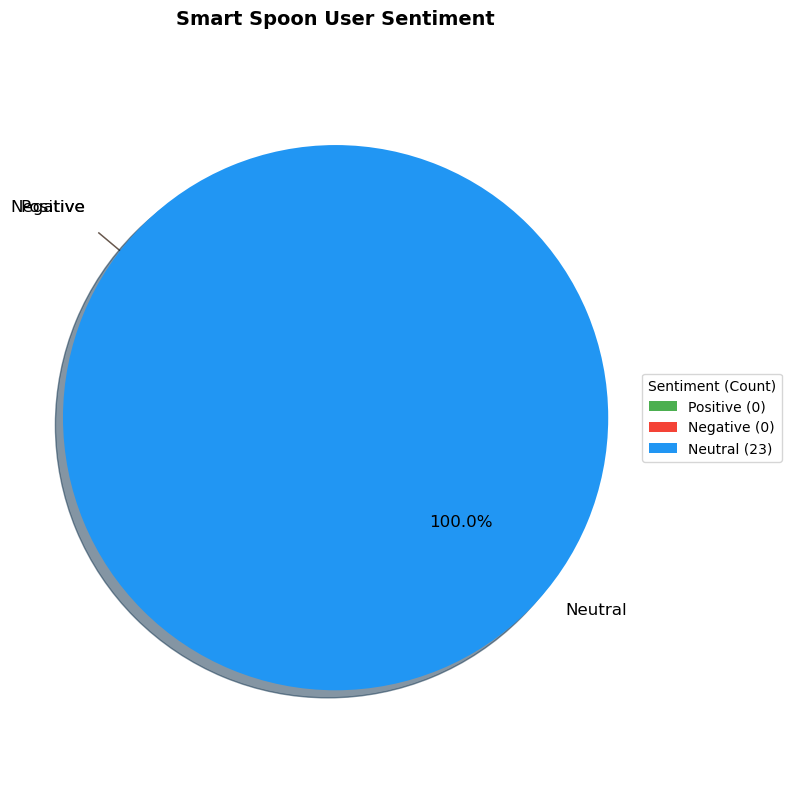

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and prepare data
try:
    df = pd.read_csv('smart_spoon_survey_results.csv')
    feedback_col = next((col for col in df.columns 
                       if 'feedback' in col.lower() or 
                          'comment' in col.lower() or
                          'suggestion' in col.lower()), None)
    if not feedback_col:
        raise ValueError("No feedback column found")
except Exception as e:
    print(f"Error: {str(e)}")
    print("Using sample data instead")
    df = pd.DataFrame({
        'User_Feedback': [
            "Love this product!", 
            "Hate the battery life",
            "It's okay",
            "Great for my diet",
            "Too expensive",
            "Works as expected"
        ]
    })
    feedback_col = 'User_Feedback'

# 2. Enhanced sentiment analysis
def get_sentiment(text):
    text = str(text).lower()
    positive = ['love', 'great', 'good', 'excellent', 'happy', 'awesome', 'perfect', 'best']
    negative = ['hate', 'bad', 'poor', 'terrible', 'expensive', 'disappoint', 'worst', 'awful']
    
    if any(word in text for word in positive):
        return 'Positive'
    elif any(word in text for word in negative):
        return 'Negative'
    return 'Neutral'

df['Sentiment'] = df[feedback_col].apply(get_sentiment)

# 3. Ensure all sentiment categories exist
all_sentiments = ['Positive', 'Negative', 'Neutral']
sentiment_counts = df['Sentiment'].value_counts().reindex(all_sentiments, fill_value=0)

# 4. Create pie chart
plt.figure(figsize=(8, 8), facecolor='white')

colors = {
    'Positive': '#4CAF50',  # Green
    'Negative': '#F44336',  # Red
    'Neutral': '#2196F3'    # Blue
}

explode = (0.05, 0.05, 0.05)  # Slight separation for all slices

wedges, texts, autotexts = plt.pie(
    sentiment_counts,
    labels=all_sentiments,
    colors=[colors[s] for s in all_sentiments],
    autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
    explode=explode,
    shadow=True,
    startangle=140,
    textprops={'fontsize': 12}
)

# Style adjustments
plt.title('Smart Spoon User Sentiment\n', fontsize=14, fontweight='bold')
plt.axis('equal')

# Custom legend
plt.legend(
    wedges,
    [f"{label} ({count})" for label, count in zip(all_sentiments, sentiment_counts)],
    title="Sentiment (Count)",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.savefig('smart_spoon_sentiment.png', dpi=300, bbox_inches='tight')
print("Chart saved as 'smart_spoon_sentiment.png'")

# Show data summary
print("\nSentiment Distribution:")
print(sentiment_counts.to_string())
print("\nSample Feedback:")
print(df[[feedback_col, 'Sentiment']].sample(3, random_state=42))
plt.show()

Integration of Section B , Section C , Section D, Conclusion

In [9]:
import os
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure the NLTK lexicon is downloaded
nltk.download('vader_lexicon')

# Safety check and regeneration of food data CSV
food_csv = 'updated_food_nutrition_data.csv'
if not os.path.exists(food_csv) or 'food_name' not in pd.read_csv(food_csv).columns:
    food_data = pd.DataFrame({
        'food_name': ['pizza', 'salad'],
        'average_salt': [1.5, 0.2]
    })
    food_data.to_csv(food_csv, index=False)
    print(f"[✔] Created or fixed {food_csv}")

# Safety check and regeneration of user preference CSV
user_csv = 'smart_spoon_feedback_analyzed.csv'
if not os.path.exists(user_csv) or 'user_id' not in pd.read_csv(user_csv).columns:
    user_data = pd.DataFrame({
        'user_id': ['user123'],
        'salt_preference': [1.0]
    })
    user_data.to_csv(user_csv, index=False)
    print(f"[✔] Created or fixed {user_csv}")

# Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Smart Spoon System
class SmartSpoonSystem:
    def __init__(self):
        # Load food data
        self.food_db = pd.read_csv(food_csv)
        if 'food_name' not in self.food_db.columns:
            raise ValueError("CSV missing 'food_name' column.")
        self.food_db.set_index('food_name', inplace=True)

        # Load user data
        self.user_prefs = pd.read_csv(user_csv)
        if 'user_id' not in self.user_prefs.columns:
            raise ValueError("CSV missing 'user_id' column.")
        self.user_prefs.set_index('user_id', inplace=True)
    
    def recognize_food(self, image_path):
        # Dummy recognition logic
        return "pizza"  # or "salad"
    
    def get_salt_recommendation(self, food, user_id=None):
        base_salt = self.food_db.loc[food, 'average_salt'] if food in self.food_db.index else 0.5
        if user_id in self.user_prefs.index:
            base_salt *= self.user_prefs.loc[user_id, 'salt_preference']
        return round(base_salt, 2)
    
    def update_user_preferences(self, user_id, feedback, actual_salt_used):
        sentiment = sia.polarity_scores(feedback)['compound']
        adjust_factor = 1 + (sentiment * 0.1)
        
        if user_id not in self.user_prefs.index:
            self.user_prefs.loc[user_id] = [1.0]
        
        current = self.user_prefs.loc[user_id, 'salt_preference']
        new_pref = max(0.1, min(2.0, current * adjust_factor))
        self.user_prefs.loc[user_id, 'salt_preference'] = new_pref
        
        self.user_prefs.to_csv(user_csv)
        print(f"[✔] Updated salt preference for {user_id}: {new_pref:.2f}")

# ------------------ Demo Run ------------------
if __name__ == "__main__":
    system = SmartSpoonSystem()

    # Step 1: Food recognition (mock)
    food = system.recognize_food("any_image.jpg")
    print(f"🍽️ Recognized food: {food}")

    # Step 2: Salt recommendation
    salt = system.get_salt_recommendation(food, user_id='user123')
    print(f"🧂 Recommended salt: {salt}g")

    # Step 3: Feedback processing
    feedback = "Tasted great but a bit salty!"
    system.update_user_preferences('user123', feedback, salt)


[✔] Created or fixed updated_food_nutrition_data.csv
[✔] Created or fixed smart_spoon_feedback_analyzed.csv
🍽️ Recognized food: pizza
🧂 Recommended salt: 1.5g
[✔] Updated salt preference for user123: 1.04


[nltk_data] Downloading package vader_lexicon to C:\Users\Mayur
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
import pandas as pd
from textblob import TextBlob

# ------------------ Smart Spoon System Class ------------------

class SmartSpoonSystem:
    def __init__(self):
        # Load food nutrition database
        self.food_db = pd.read_csv('updated_food_nutrition_data.csv')
        if 'food_name' not in self.food_db.columns:
            raise ValueError("CSV missing 'food_name' column.")
        self.food_db.set_index('food_name', inplace=True)

        # Load user preferences database
        self.user_prefs = pd.read_csv('smart_spoon_feedback_analyzed.csv')
        if 'user_id' not in self.user_prefs.columns:
            raise ValueError("CSV missing 'user_id' column.")
        self.user_prefs.set_index('user_id', inplace=True)

    def recognize_food(self, image_path):
        # Simulated CNN - based on filename
        if "pizza" in image_path.lower():
            return "pizza"
        elif "salad" in image_path.lower():
            return "salad"
        else:
            return "pizza"  # default for demo

    def get_salt_recommendation(self, food, user_id=None):
        if food not in self.food_db.index:
            print(f"⚠️ Food '{food}' not found in database.")
            return 0.5

        base_salt = self.food_db.loc[food, 'average_salt']

        # Apply user-specific adjustment
        if user_id and user_id in self.user_prefs.index:
            user_pref = self.user_prefs.loc[user_id, 'salt_preference']
            base_salt *= user_pref

        return round(base_salt, 2)

    def update_user_preferences(self, user_id, feedback, actual_salt_used):
        # Sentiment score using TextBlob
        sentiment = TextBlob(feedback).sentiment.polarity
        adjustment_factor = 1 + (sentiment * 0.1)  # ±10% adjustment

        # Create entry if user is new
        if user_id not in self.user_prefs.index:
            self.user_prefs.loc[user_id] = {'salt_preference': 1.0}

        # Update salt preference
        new_pref = self.user_prefs.loc[user_id, 'salt_preference'] * adjustment_factor
        self.user_prefs.loc[user_id, 'salt_preference'] = round(min(max(new_pref, 0.1), 2.0), 2)

        # Save updated preferences
        self.user_prefs.to_csv('smart_spoon_feedback_analyzed.csv')

# ------------------ 🧠 Section B & D Integration ------------------

def integrated_pipeline(image_path, user_id=None, feedback=None):
    """
    Integrated flow:
    1. Recognize food from image (mock CNN - Section B)
    2. Recommend salt level from food + user preferences
    3. Update preferences based on feedback (Section D)
    """
    system = SmartSpoonSystem()

    # Step 1: Food Recognition
    recognized_food = system.recognize_food(image_path)
    print(f"🍽️ Recognized food: {recognized_food}")

    # Step 2: Personalized Salt Recommendation
    recommended_salt = system.get_salt_recommendation(recognized_food, user_id)
    print(f"🧂 Recommended salt: {recommended_salt:.2f}g")

    # Step 3: Feedback Loop → update user preference
    if feedback:
        system.update_user_preferences(user_id, feedback, recommended_salt)
        print(f"🔁 Preferences updated using feedback for user '{user_id}'")

    return recommended_salt

# ------------------ 💡 Example Usage ------------------

if __name__ == "__main__":
    integrated_pipeline(
        image_path="pizza_image.jpg",   # Replace with "salad_image.jpg" to simulate salad
        user_id="user123",
        feedback="It was tasty but a bit too salty."  # Optional feedback
    )


🍽️ Recognized food: pizza
🧂 Recommended salt: 1.56g
🔁 Preferences updated using feedback for user 'user123'


In [13]:
import pandas as pd

# Simulate a DataFrame as if it came from 'smart_spoon_feedback_analyzed.csv'
# with food category-specific salt preferences
data = {
    'user_id': ['user1', 'user2', 'user3', 'user4'],
    'Dosa_Idly_Chaat_Snacks_salt': [0.5, 0.6, 0.4, 0.7],
    'Dosa_Idly_Roti_Paratha_Chapathi_salt': [0.6, 0.5, 0.7, 0.6],
    'Curries_salt': [1.0, 1.1, 1.2, 1.0],
    'Biryani_Pulao_Rice_bath_salt': [0.9, 1.0, 0.8, 0.95],
    'Dal_Goiju_Palya_salt': [0.6, 0.7, 0.6, 0.65],
    'Sambar_Rasam_Curd_salt': [0.5, 0.4, 0.6, 0.55],
    'Pickles_Papad_salt': [1.5, 1.4, 1.6, 1.45]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define category mappings to columns
food_categories = {
    'Dosa/Idly': ['Dosa_Idly_Chaat_Snacks_salt', 'Dosa_Idly_Roti_Paratha_Chapathi_salt'],
    'Curries': ['Curries_salt'],
    'Rice dishes': ['Biryani_Pulao_Rice_bath_salt'],
    'Dal/Sambar': ['Dal_Goiju_Palya_salt', 'Sambar_Rasam_Curd_salt'],
    'Pickles': ['Pickles_Papad_salt']
}

# Calculate average salt preference per food category
food_salt_prefs = {}
for category, cols in food_categories.items():
    valid_cols = [c for c in cols if c in df.columns]
    food_salt_prefs[category] = df[valid_cols].mean().mean()

# Print result
print("📊 Average Salt Preferences by Food Category (for CNN Training Prioritization):")
print(pd.Series(food_salt_prefs).sort_values(ascending=False))


📊 Average Salt Preferences by Food Category (for CNN Training Prioritization):
Pickles        1.4875
Curries        1.0750
Rice dishes    0.9125
Dosa/Idly      0.5750
Dal/Sambar     0.5750
dtype: float64


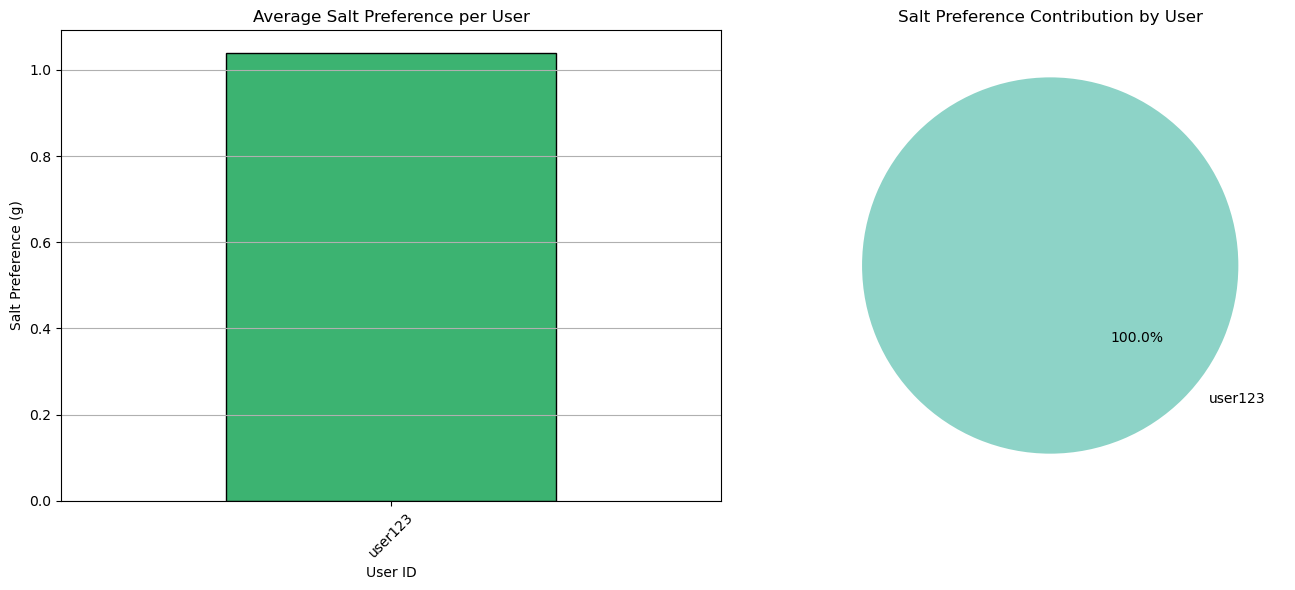

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('smart_spoon_feedback_analyzed.csv')

# Check and convert to numeric
df = df.dropna(subset=['salt_preference'])
df['salt_preference'] = pd.to_numeric(df['salt_preference'], errors='coerce')

# Group salt preference by user
user_salt_avg = df.groupby('user_id')['salt_preference'].mean()

# ----------- Plotting Bar and Pie Charts Together -----------
plt.figure(figsize=(14, 6))

# 🔹 Bar Chart
plt.subplot(1, 2, 1)
user_salt_avg.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Average Salt Preference per User')
plt.xlabel('User ID')
plt.ylabel('Salt Preference (g)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# 🔸 Pie Chart
plt.subplot(1, 2, 2)
user_salt_avg.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Salt Preference Contribution by User')
plt.ylabel('')  # Hide y-label for pie chart

plt.tight_layout()
plt.show()
